# Importing Necessary Libraries

Since we will be solving differential equations using numerical methods, hence, "SymPy" won't be required. However, we will be NumPy since we will be using numerical expressions to define our mathematical functions. Additionally, our output will be in matrix form. So NumPy is a MUST! 

Most importantly, we will be solving the differential equations(First order first degree ODE), with the help of SciPy's "*integrate*" module and its "*odeint*" solver.

In [2]:
import numpy as np
from numpy import *
# import sympy as sp
# from sympy import *
import scipy
from scipy.integrate import odeint

So the workflow for solving this equation is as follows: 


1.   First, rearrange the given function in a way that looks like:
$dy/
dx
= f(x,y)$

2. Upon rearranging, the right hand side of the equation will be input through the "*odeint*" function. 
3. Define the independent variable as per the question (MUST be in a list, even though it's just a single number. However, it advised that even though it's a single number, take at least 3-4 numbers in that list as you like.)





# Problem 1

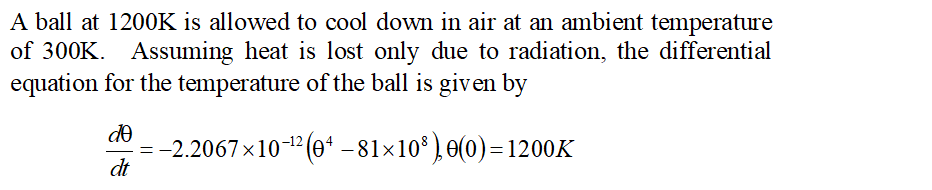

Now, to solve this equation, 


1.   Firstly, we first need to rearrange the equation in the form:
$dy/
dx
= f(x,y)$ . But in the problem above, it won't be required since the given equation is already in the desired form!

2. Upon rearranging, the right hand side of the equation will be input through the "*odeint*" function. That is, we will be defining the function as $2.2067 \times 10^{-12}(\theta^{4}-81\times 10^{8})$
3. I am using the "*np.linspace()*" to generate my input, which is, from 0 second to 480 second. The reason I chose 480 is not completely arbitrary. I want to know the value of $\theta$ at 480 seconds. However, you might be wondering, what if, I take only "480" as my input! Yes I can take only 480 as well; along with some random number(remember to not take a single-element list).

Let's solve it now!



**Defining the function** (You can define either with "*lambda function*" or with python's by default function method.)

In [3]:
dtheta_dt= lambda t,theta: -2.2067e-12*(theta**4-81e8)
# or
def dtheta_dt(t,theta):
  return -2.2067e-12*(theta**4-81e8)

**Taking the input: ** Please refer to [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) and see how it works. I am naming my input variable as "step", you can name it as "t_val"/"independent_var", or whatever you like. 

In [4]:
step=np.linspace(0,480,480)

**Solving the equation:** We will be using "*odeint*". Refer to "*[odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)*"

In the *odeint* function, you might see a parameter, called, "*tfirst*". For the odeint, "*y*" represents the dependent variable and "*t*" represents the independent variable, and "*y0*" represents initial boundary condition. You would notice, while I was defining the function, I wrote "*t*"(the independent variable) first and then "*Θ*". Therefore, by saying "*tfirst=True*", I am letting the function know that, "*t*" is the independent and "*theta*" is dependent variable. If you do the opposite, meaning, if you write, "*def dtheta_dt(theta,t):*", then you would have written "*tfirst=False*"

In [6]:
solve1=odeint(dtheta_dt,y0=0, t=step, tfirst=True)
solve1.shape

(480, 1)

As you can see, the shape of the *solve1* is of (480x1), meaning, it has 480 rows and 1 column. Which is understandable- since, I have taken 480 number of values in the input, and each *t* value returned its corresponding $\theta$ values, hence, 480 rows and 1 column. If you are still confused how we got to 480 values, please run a cell writing "*step.shape*" and how *np.linspace* works.

# Problem 2

Consider the equation of a freely falling object
$dv/
dt
= g – bv^2$
1. Solve the differential equation where Take $b = 1$ and $g = 10$. Initial condition: $v(0)=0$ 

**Method 1:**

In [7]:
def dvdt(t,v):
  return 10-1*v**2
step= np.linspace(0,100,100)
solve3= odeint(dvdt,y0=0,t=step,tfirst=True)

**Method 2:**

In [8]:
def dvdt(t,v,g,b):
  return g-b*v**2
step= np.linspace(0,100,100)
solve3= odeint(dvdt,y0=0,t=step,args=(10,1), tfirst=True)

**Differences between the method:** The only difference these two methods have is in the first method, I have substituted the value of "b" and "g" while I was defining the function. On the contrary, in the second method, I did not substituted the values while defining the function, rather used an extra parameter in the "*odeint*" function, called, "args()". There I have written 10 and 1 respectively since while defining the function, "g" preceeds "b".

**QUESTION2:**

2. Solve the differential equation when $b$, i.e $b = 1,$ $b = 2,$ $b = 3$, $b = -4$, and $b = -2$. Initial condition: $v(0)=0$ 

# Solve to the Q(2_2)

In [9]:
#Defining the Function
def dvdt(t,v,g,b):
  return g-b*v**2
#Creating a matrix beforehand, where I would replace "0" with the values obtained by "odeint" function.
result=np.zeros((5,100))

**How do I know the size of the matrix?:** As you know from Q(2_1), we have obtained an output of (100x1) matrix. Since, I have taken an input containing 100 values, I have obtained each corresponding "v". But interestingly, that was for only one "b" value. In this problem, we are tasked to solve the equation for five "b" values. Meaning, you will be solving the same equation considering b=-4, b=-2, b=1, b=2, b=3. Meaning, you will be obtaining 100 values for each b values. The matrix could be demonstrated using the checker board below:

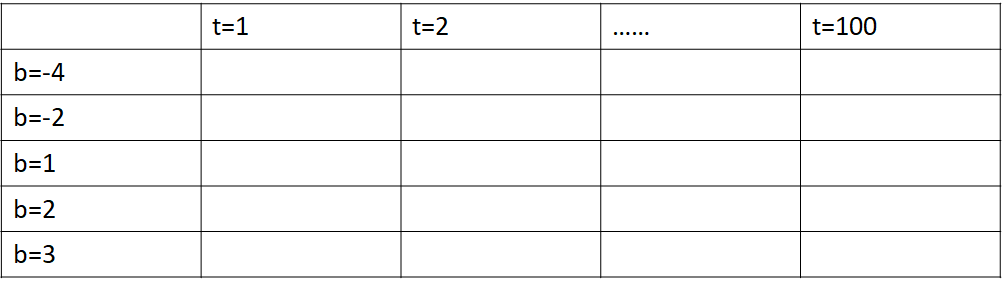

In [ ]:
step= np.linspace(0,100,100)
b_1=np.array([-4,-2,1,2,3])
for i in range(len(b_1)):
  solve3= odeint(dvdt,y0=0,t=step,args=(10,b_1[i]), tfirst=True)
  result[i,]=solve3.T
result

**Explanation:** You might notice I have transposed the matrix while saving it to the result matrix- "*result[i,]=solve3.T*". It is not mandatory at all. If you do not transpose the matrix, then your result matrix will be of (100x5) size and you would be required to declare the *result* matrix as: "*result=np.zeros((100,5))*" and store the value to the matrix as: *result[ , i]=solve3*

# Symbolic Solution
The following part is not included in the syllabus- so do not get worked up on this. However, interested ones can take a look. Here, I manually solved the differential equation using sympy and determined the value at a certain "t", that is t=100, when b=1 and g=10. 

In [10]:
#Imported sympy library
import sympy as sp
from sympy import *
#defining the symbols
v,t,g,b=sp.symbols('v,t,g,b')

[3.1622776601683795]

A bit of rearraning yields: $dv/
g – bv^2$
= $dt$

So, I manually integrate the left hand side and I knew, upon integrating the right hand side would be "t". So I formed and equation using "*sp.Eq()*". Then, I solved the equation, considering "*v*" is a variable and the rest of the symbols, i.e., b,g,t are constants. the solution for "*v*" is stored in *expr7*, I, then, "lambdify-d" the *expr7* to make it a numeric expression so that it becomes easier to substitute the value of "b,g, and t". You might want to see what the solve for v, that is, expr7 looks like. You can use "pprint(expr7)" to check it out. 
Lastly, I substituted the value of b,g, and t which yields almost the same result as the numerical one! 

In [ ]:
expr5= (1/(g-b*v**2))
solve5= sp.integrate(expr5,v)
expr6=sp.Eq(solve5,t)
expr7=sp.solve(expr6,v)
expr8=sp.lambdify((b,g,t),expr7)
expr8(1,10,100)